In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')
samp=pd.read_csv('sample_submission.csv')

- Steps to be performend:
    - 1)Handling missing values
    - 2)Checking numerical variables and its relationship with target variable(Sales Price)
    - 3)Distribution of numerical variables(both Continious and Descrete)
    - 4)Handling categorical variables and i.e. its cardinality
    - 5)Handling Outliers
    - 6)Handling skewed data
    - 7)Feature Scaling
    - 8)Encoding
    - 9)Model deployment and selection of the best one.

## EDA

In [3]:
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
print(train.shape,test.shape)

(1460, 81) (1459, 80)


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Checking Null Values

In [5]:
values=train.isnull().sum().sort_values(ascending=False)
cent=(train.isnull().sum()/train.isnull().count()*100).sort_values(ascending=False)
null = pd.concat([values,cent],axis=1,keys=['Null','Cent'])
null.head(20)

,Null,Cent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [6]:
mode_ls=train[['LotFrontage','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',\
       'FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond',\
              'Electrical']].mode().values
medianfill=train['GarageYrBlt'].median()
meanfill=train['LotFrontage'].mean()
MasVnrArea=train['MasVnrArea'].mean()
mantymean=train['MasVnrType'].mode()
train['LotFrontage'].fillna(meanfill,inplace=True)
train['GarageYrBlt'].fillna(medianfill,inplace=True)
train['MasVnrArea'].fillna(MasVnrArea,inplace=True)
train['MasVnrType'].fillna(mantymean,inplace=True)
train['BsmtQual'].fillna(mode_ls[0][1],inplace=True)
train['BsmtCond'].fillna(mode_ls[0][2],inplace=True)
train['BsmtExposure'].fillna(mode_ls[0][3],inplace=True)
train['BsmtFinType1'].fillna(mode_ls[0][4],inplace=True)
train['BsmtFinType2'].fillna(mode_ls[0][5],inplace=True)
train['FireplaceQu'].fillna(mode_ls[0][6],inplace=True)
train['GarageType'].fillna(mode_ls[0][7],inplace=True)
train['GarageFinish'].fillna(mode_ls[0][9],inplace=True)
train['GarageQual'].fillna(mode_ls[0][10],inplace=True)
train['GarageCond'].fillna(mode_ls[0][11],inplace=True) 
train['Electrical'].fillna(mode_ls[0][12],inplace=True) 
#Dropping cols with most nan values:
train.drop(columns=['PoolQC','Fence','MiscFeature','Alley','FireplaceQu'],inplace=True)

In [7]:
mode_ls=test[['LotFrontage','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',\
       'FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond',\
              'Electrical']].mode().values
medianfill=test['GarageYrBlt'].median()
meanfill=test['LotFrontage'].mean()
MasVnrArea=test['MasVnrArea'].mean()
mantymean=test['MasVnrType'].mode()
test['LotFrontage'].fillna(meanfill,inplace=True)
test['GarageYrBlt'].fillna(medianfill,inplace=True)
test['MasVnrArea'].fillna(MasVnrArea,inplace=True)
test['MasVnrType'].fillna(mantymean,inplace=True)
test['BsmtQual'].fillna(mode_ls[0][1],inplace=True)
test['BsmtCond'].fillna(mode_ls[0][2],inplace=True)
test['BsmtExposure'].fillna(mode_ls[0][3],inplace=True)
test['BsmtFinType1'].fillna(mode_ls[0][4],inplace=True)
test['BsmtFinType2'].fillna(mode_ls[0][5],inplace=True)
test['FireplaceQu'].fillna(mode_ls[0][6],inplace=True)
test['GarageType'].fillna(mode_ls[0][7],inplace=True)
test['GarageFinish'].fillna(mode_ls[0][9],inplace=True)
test['GarageQual'].fillna(mode_ls[0][10],inplace=True)
test['GarageCond'].fillna(mode_ls[0][11],inplace=True) 
test['Electrical'].fillna(mode_ls[0][12],inplace=True) 
#Dropping cols with most nan values:
test.drop(columns=['PoolQC','Fence','MiscFeature','Alley','FireplaceQu'],inplace=True)

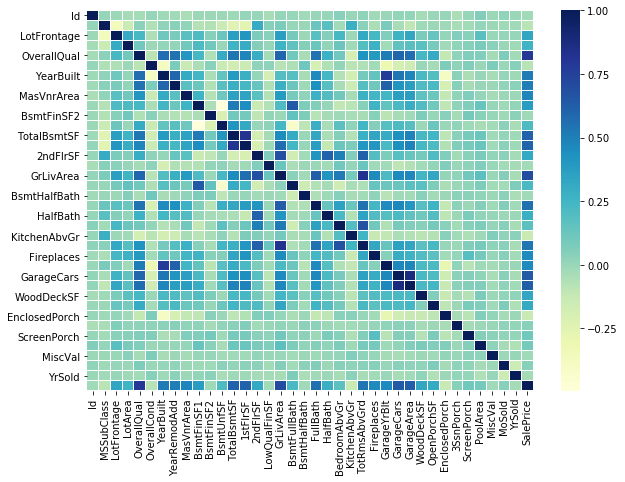

In [8]:
#Checking Correlation for left out columns
crr=train.corr()
plt.figure(figsize=(10,7))
sns.heatmap(crr,cmap ="YlGnBu", linewidths = 0.1)
plt.show()

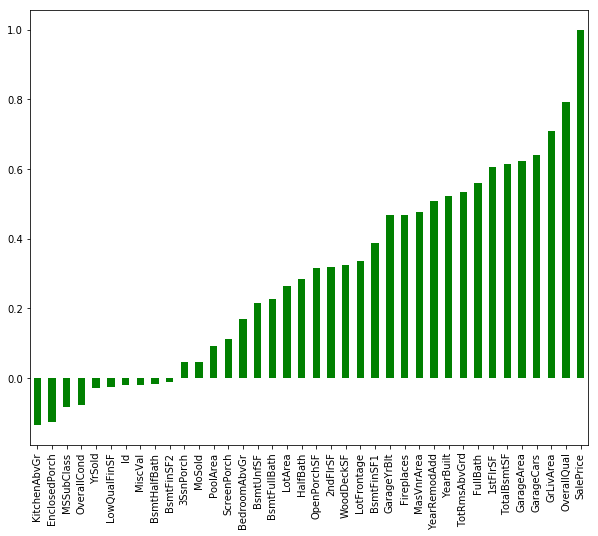

In [9]:
#SalesPrice correlation with all the feature
plt.figure(figsize=(10,8))
c=train.corr()['SalePrice'].sort_values().plot(kind='bar',color='green')

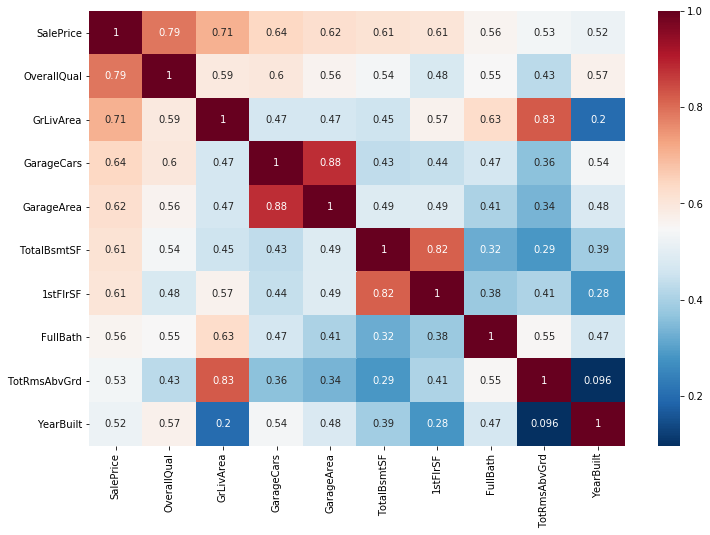

In [10]:
#Heatmap for top 10 Sales Price-features correlation
k = 10
cols = train.corr().nlargest(k, 'SalePrice')['SalePrice'].index
k_corr_matrix = train[cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(k_corr_matrix, annot=True, cmap=plt.cm.RdBu_r)

## Numerical columns

In [11]:
num_col = [i for i in train.columns if train[i].dtype!="O"]
cat_col = [i for i in train.columns if train[i].dtype=="O"]

In [12]:
num_col.remove('Id')

In [13]:
print('Percentage of numerical columns are:',(len(num_col)/train.shape[1])*100,'%')
print('Percentage of categorical columns are:',(len(cat_col)/train.shape[1])*100,'%')
train[num_col].head()

Percentage of numerical columns are: 48.68421052631579 %
Percentage of categorical columns are: 50.0 %


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


## Getting year cols

In [14]:
year_col = [i for i in num_col if 'Yr' in i or 'Year' in i]
train[year_col].head(2)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007


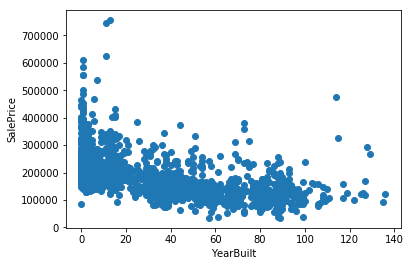

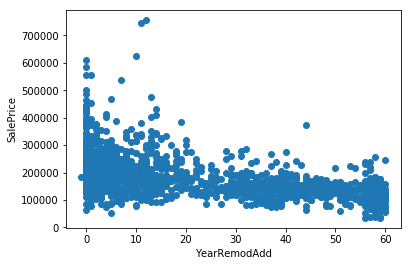

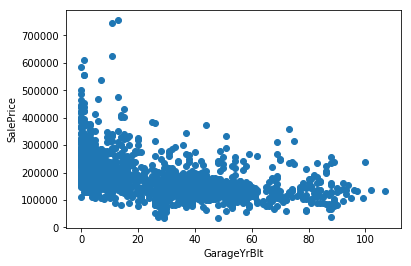

In [15]:
#here we are trying to check the relation of age of house with sale price
for feature in year_col:
    if feature!='YrSold':
        data=train.copy()
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()
#We can clearly see if the house is older the PRICE is LESSER.

In [16]:
#Lets try to check other numerical columns
#Lets get all continious columns 1st:
des_col = [i for i in num_col if (train[i].nunique()<25)]
cont_col = [i for i in num_col if (train[i].nunique()>25)]
print('No. of descrete columns:',len(des_col))
print('No. of continious columns:',len(cont_col))

No. of descrete columns: 18
No. of continious columns: 19


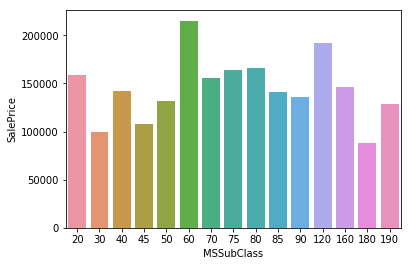

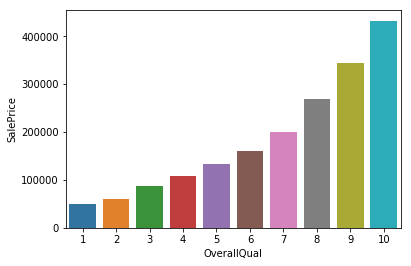

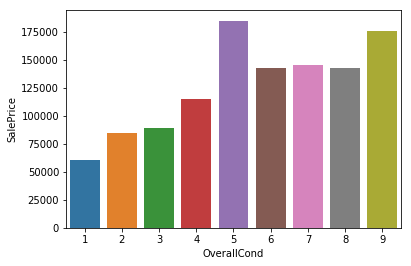

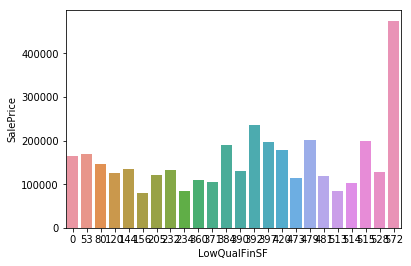

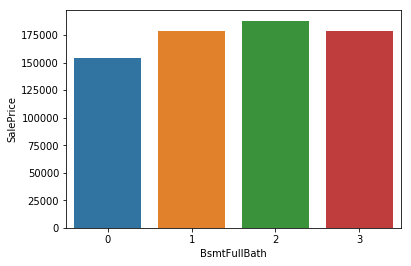

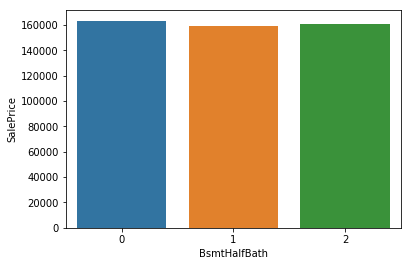

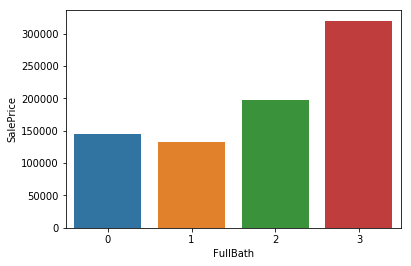

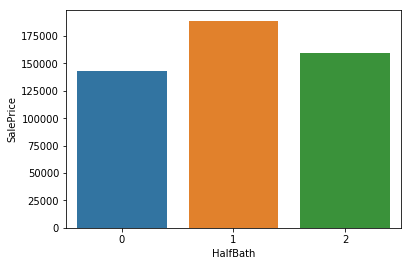

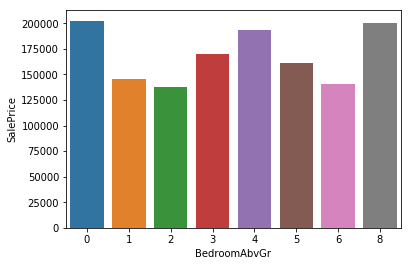

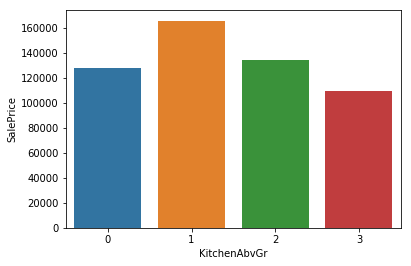

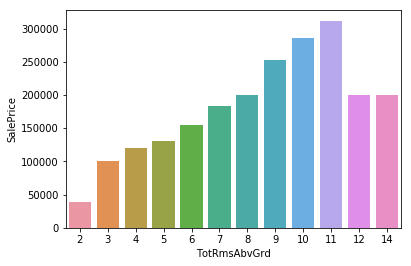

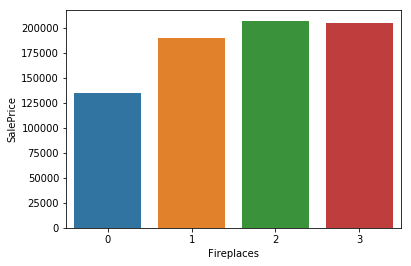

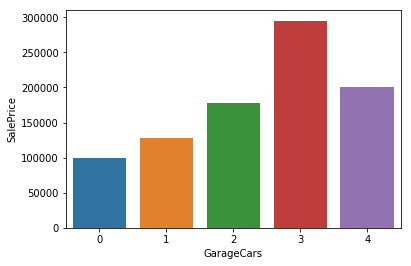

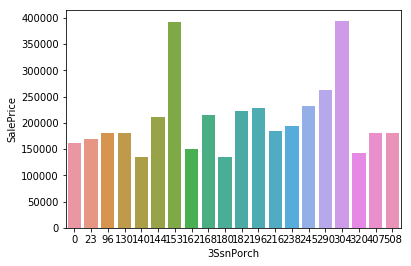

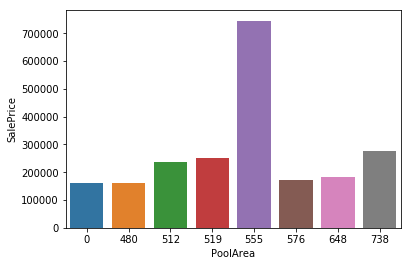

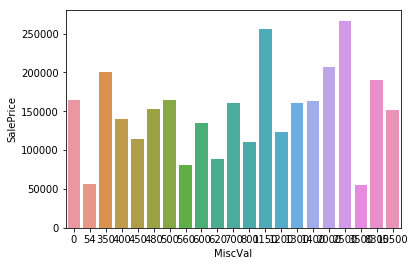

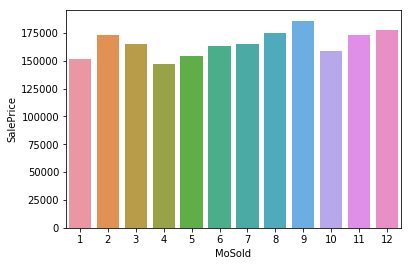

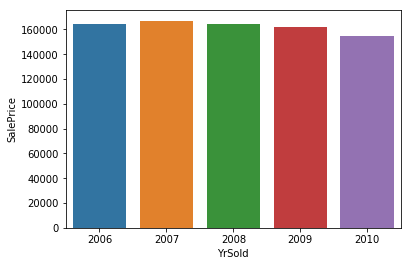

In [17]:
#Checking relationship of sales with discrete numerical cols
for i in des_col:
    dat=train.groupby(i)['SalePrice'].median().reset_index()
    sns.barplot(data=dat,x=i,y='SalePrice')
    plt.show()
#for most cases we can observe the as the value increases the sale price is also increasing.

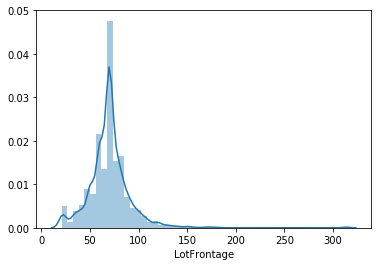

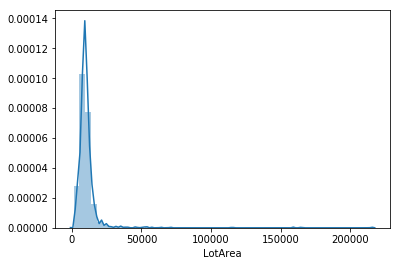

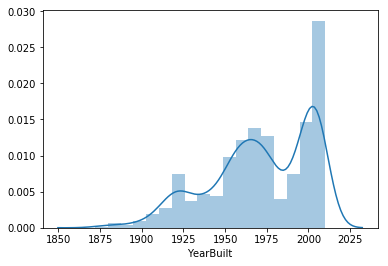

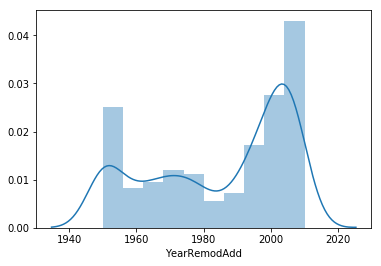

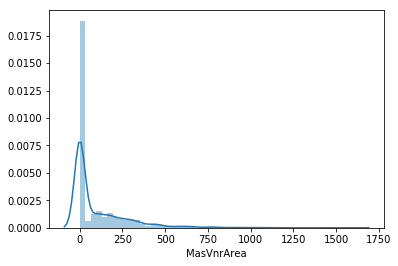

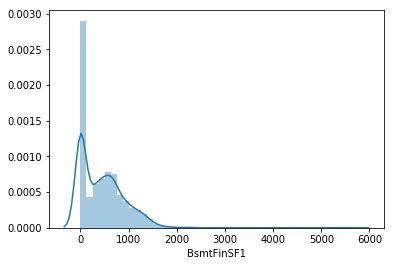

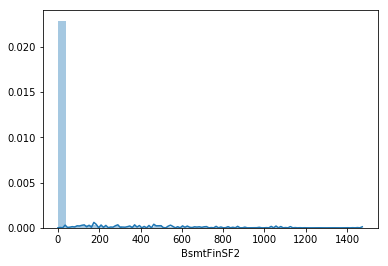

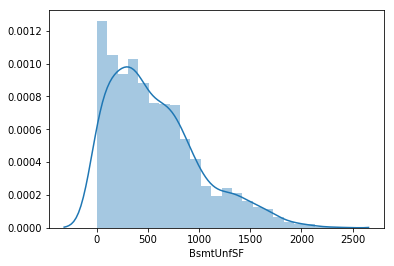

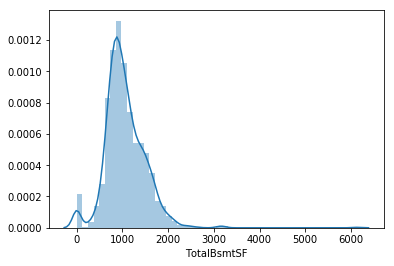

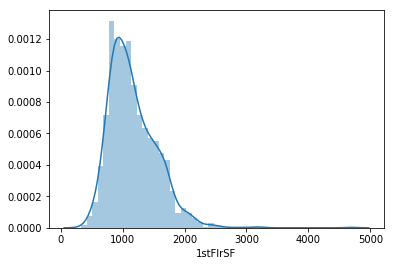

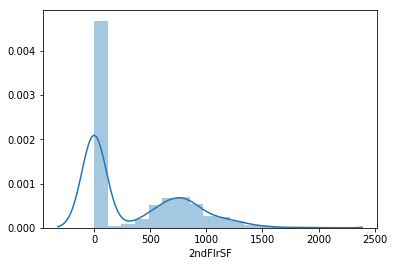

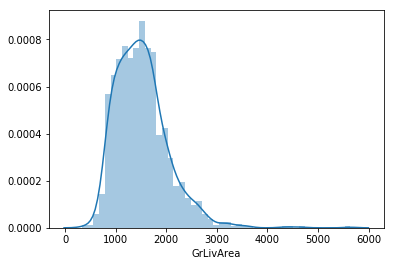

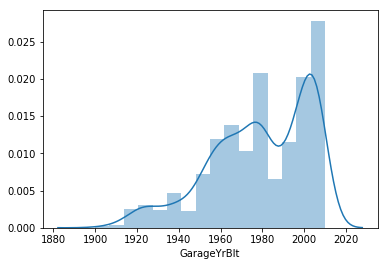

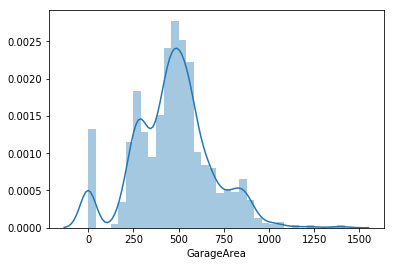

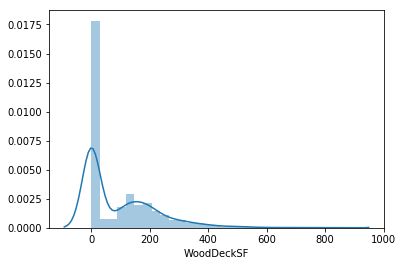

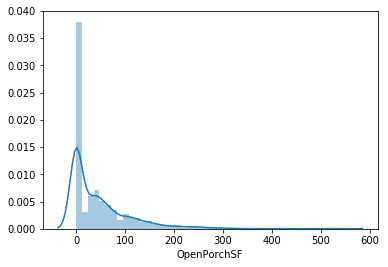

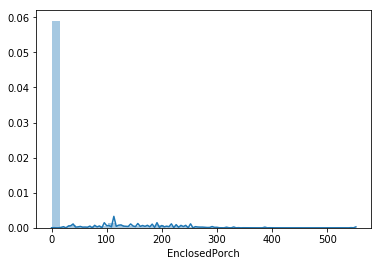

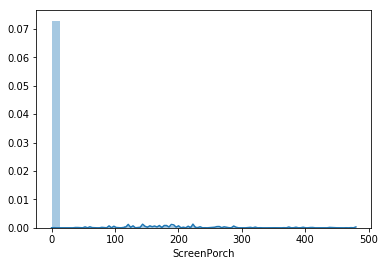

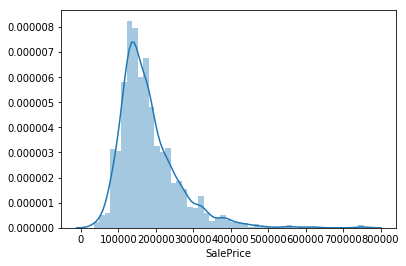

In [18]:
#Checking relationship of sales with continious numerical cols
for i in cont_col:
    try:
        sns.distplot(train[i])
        plt.show()
    except:
        pass
#Here we can see most of our continious variable is right skewed so we will apply log transformation.

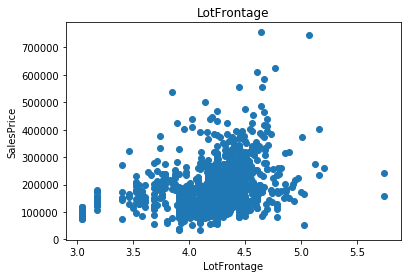

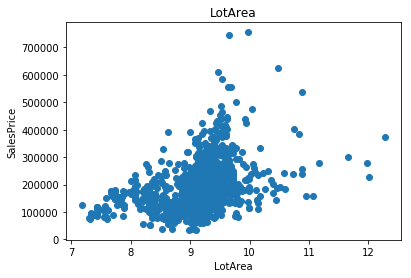

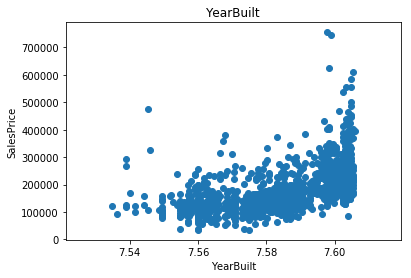

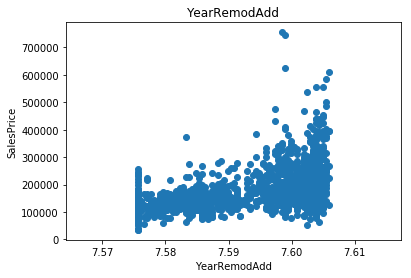

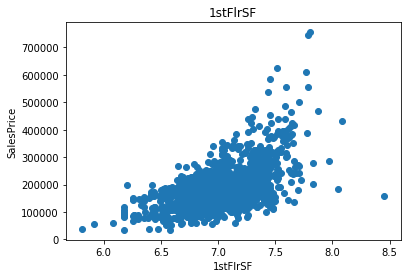

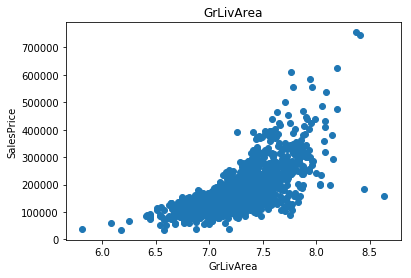

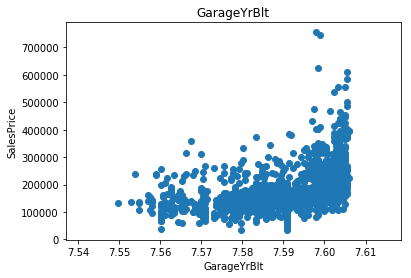

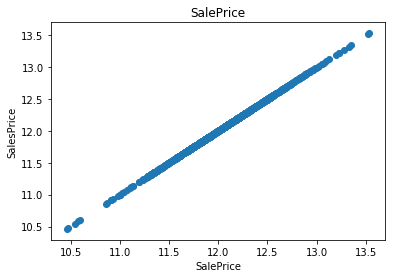

In [19]:
#Applying log transformation
for feature in cont_col:
    if 0 in train[feature].unique():
        pass
    else:
        train[feature]=np.log(train[feature])
        plt.scatter(train[feature],train['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()


## Handling Outliers

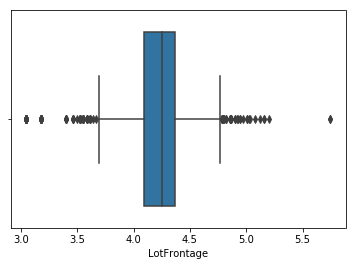

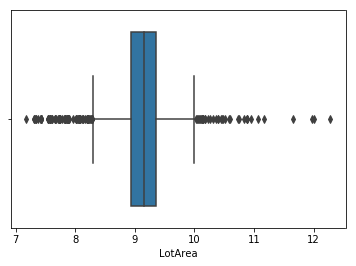

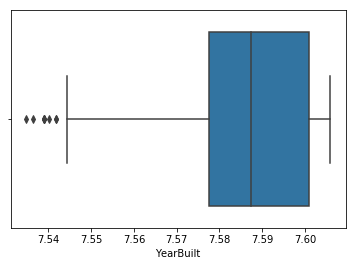

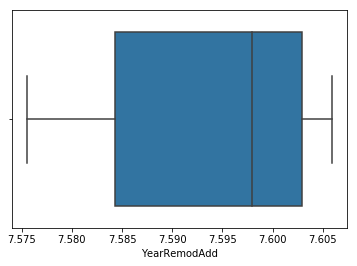

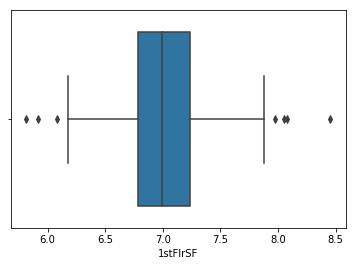

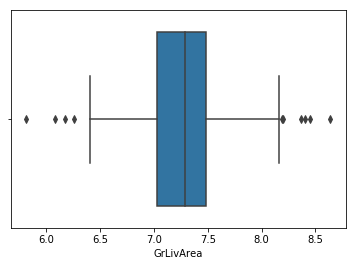

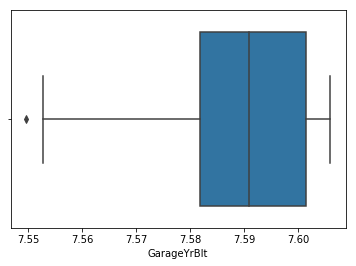

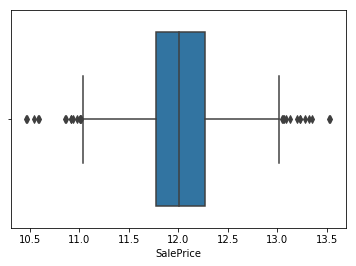

In [20]:
#Checking for outliers in each continious numerical cols.
for i in cont_col:
    if 0 in train[i].unique():
        pass
    else:
        sns.boxplot(train[i])
        plt.show()

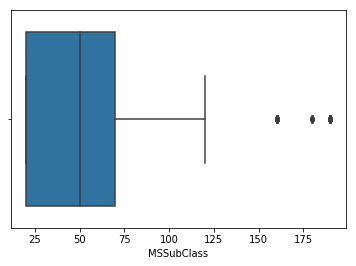

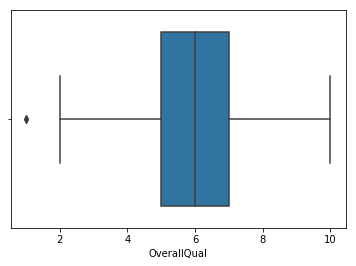

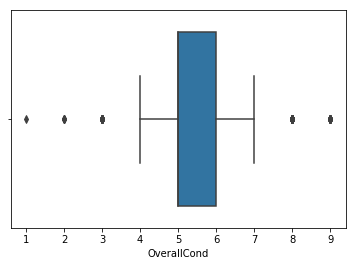

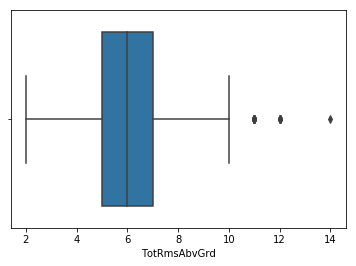

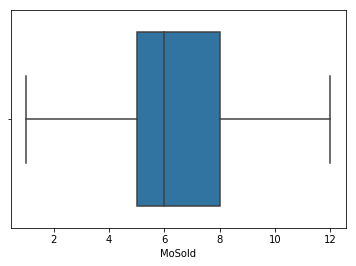

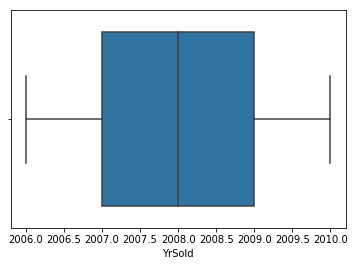

In [21]:
#Checking for outliers in each discrete numerical cols.
for i in des_col:
    if 0 in train[i].unique():
        pass
    else:
        sns.boxplot(train[i])
        plt.show()

In [22]:
def cap_out(x):
    ul = x.quantile(0.75)+1.5*(x.quantile(0.75)-x.quantile(0.25))
    ll = x.quantile(0.25)-1.5*(x.quantile(0.75)-x.quantile(0.25))
    x = x.clip_upper(ul)
    x = x.clip_lower(ll)
    return x

train[num_col]=train[num_col].apply(lambda x: cap_out(x))


C:\Users\Kishlaya\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  after removing the cwd from sys.path.
C:\Users\Kishlaya\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  """


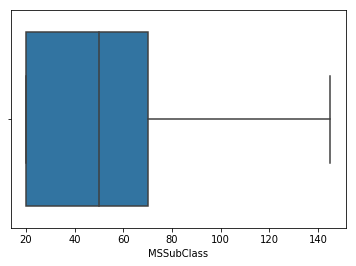

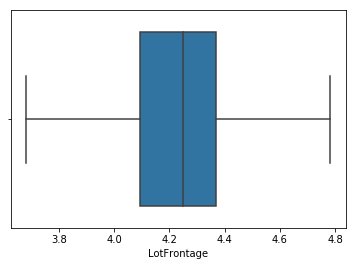

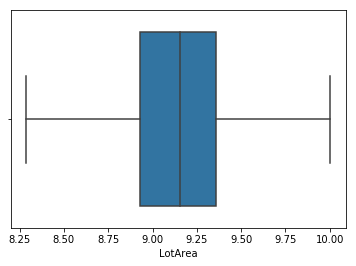

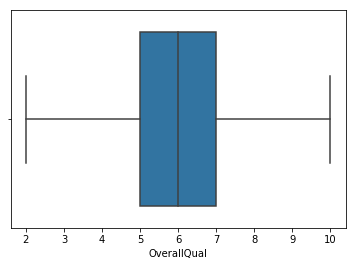

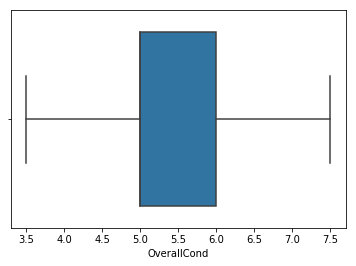

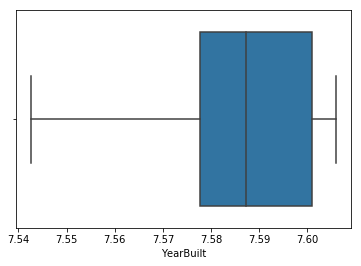

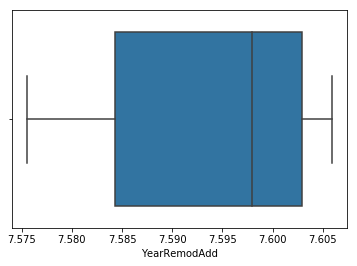

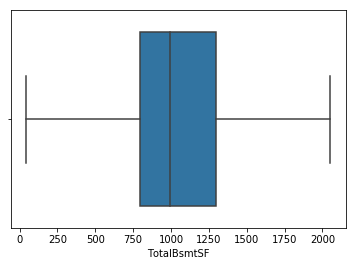

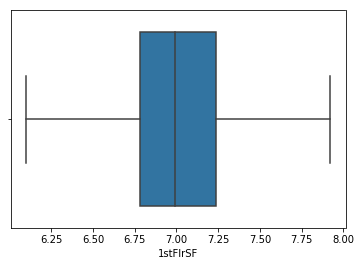

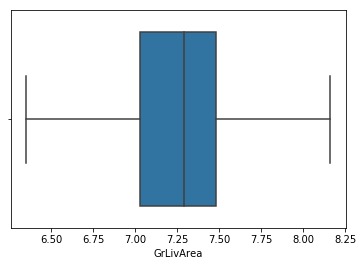

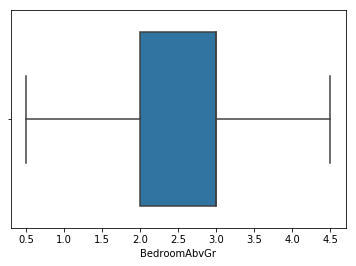

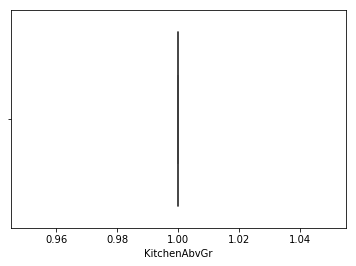

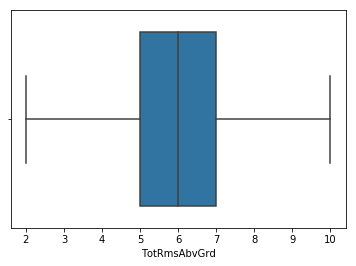

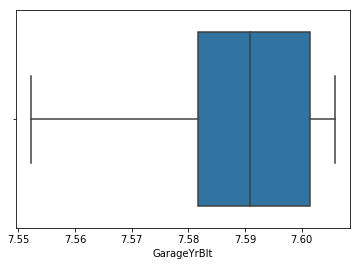

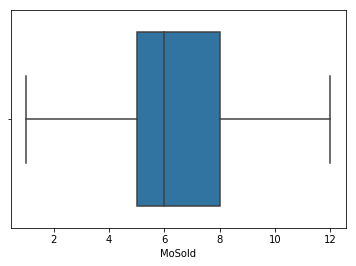

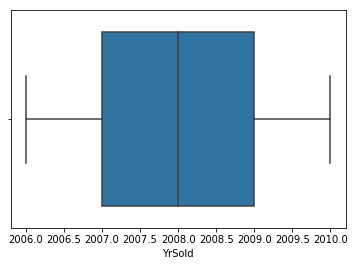

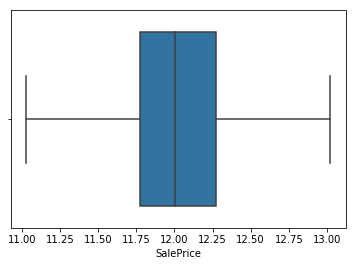

In [23]:
#As we can see all outliers are capped.
for i in num_col:
    if 0 in train[i].unique():
        pass
    else:
        sns.boxplot(train[i])
        plt.show()

## Categorical columns

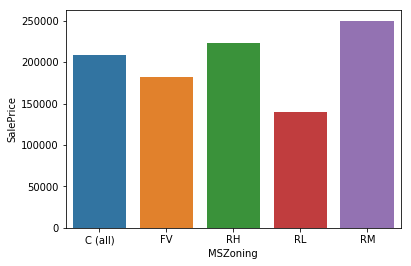

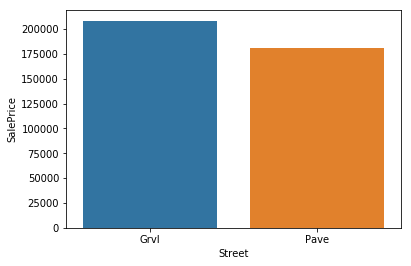

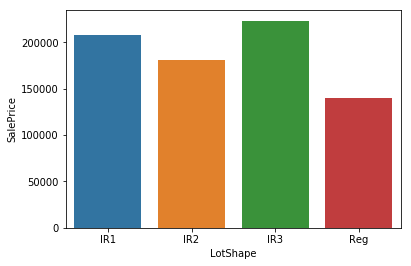

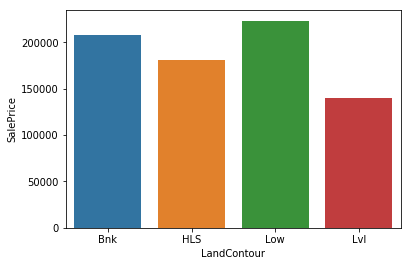

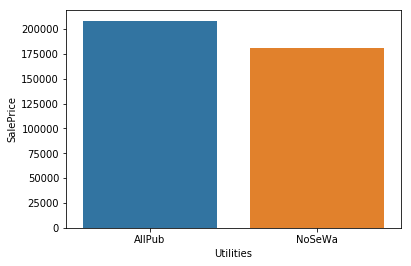

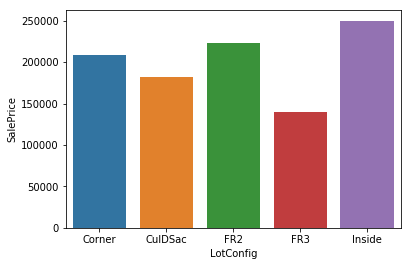

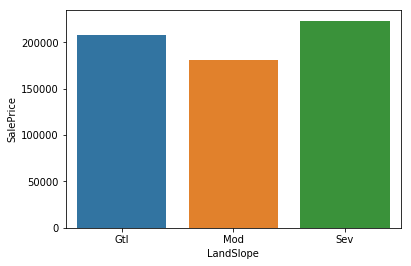

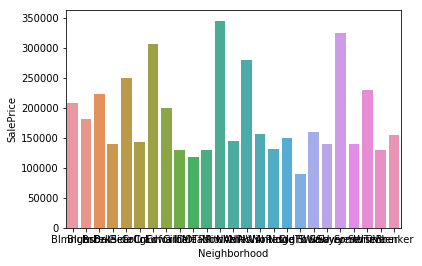

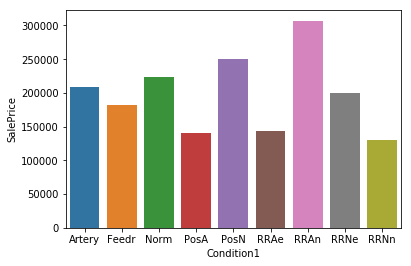

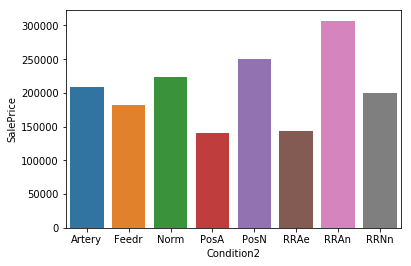

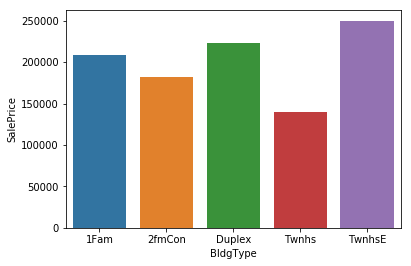

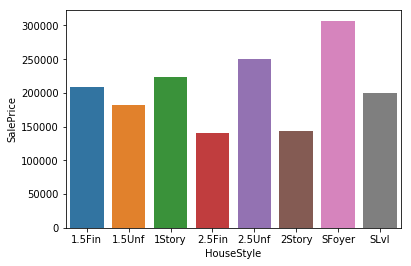

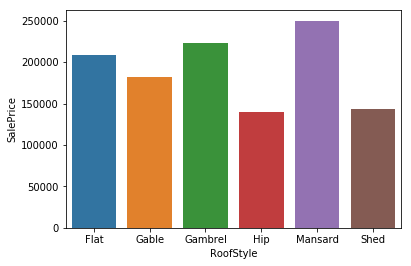

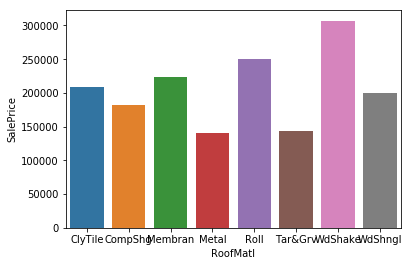

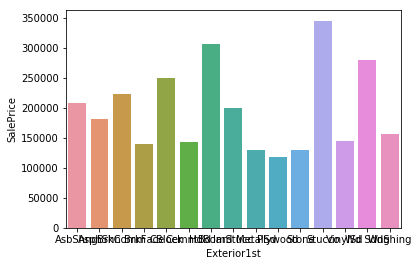

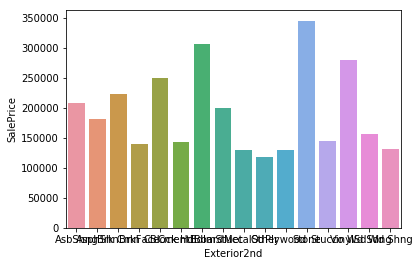

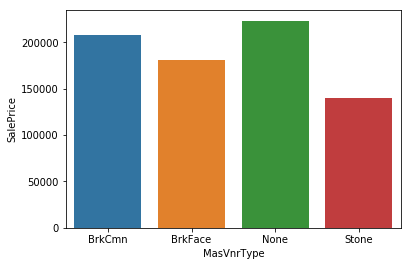

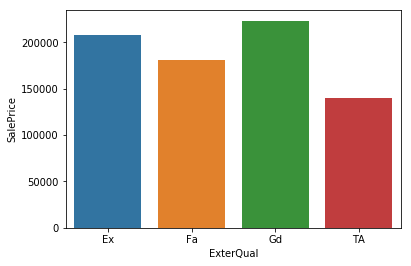

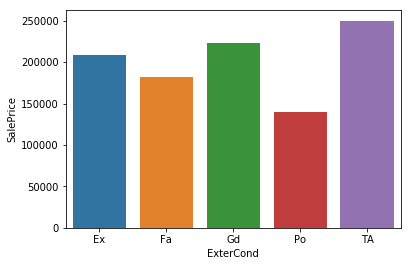

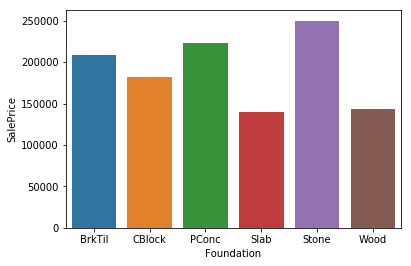

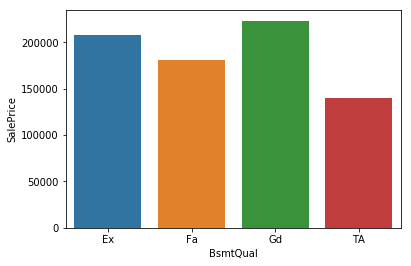

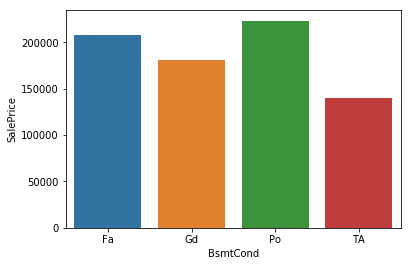

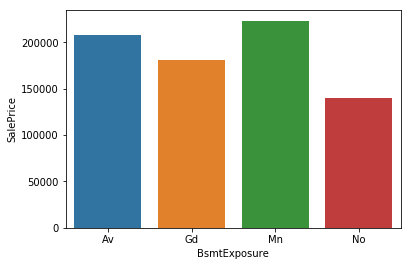

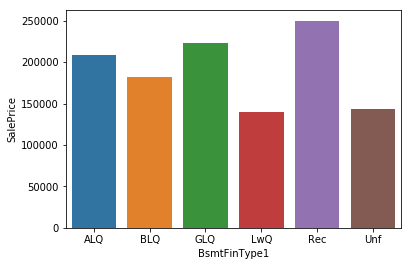

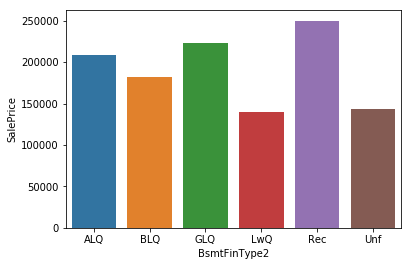

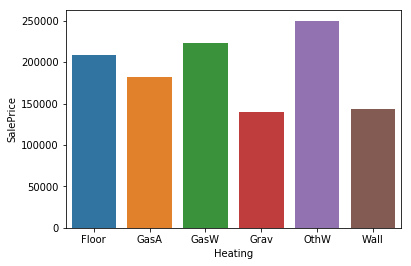

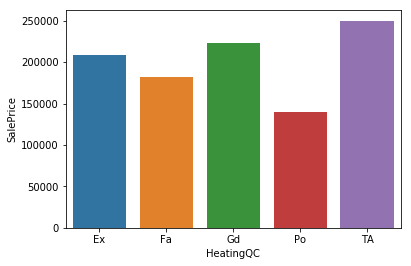

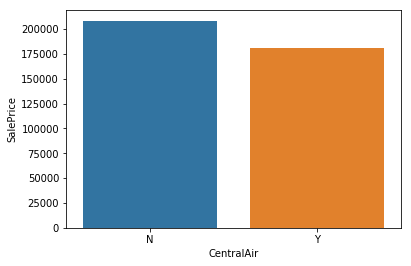

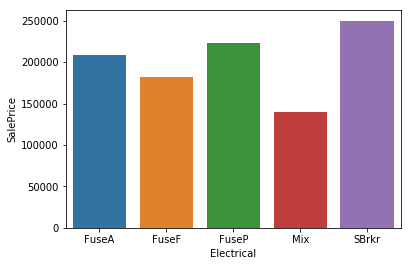

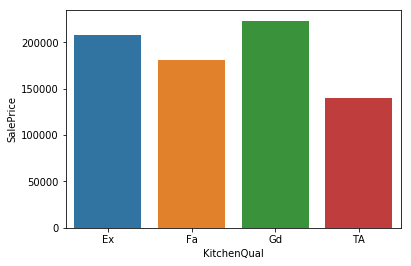

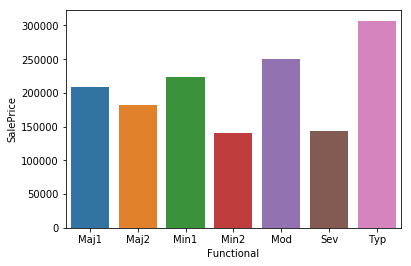

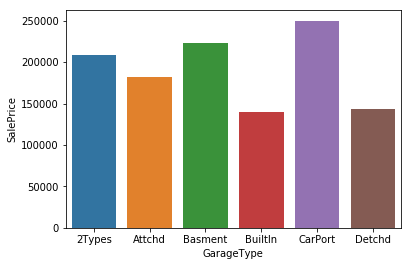

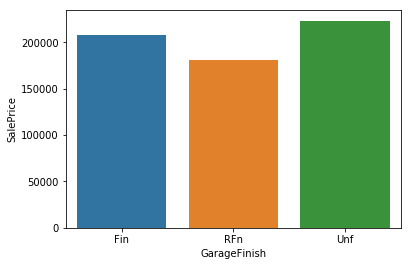

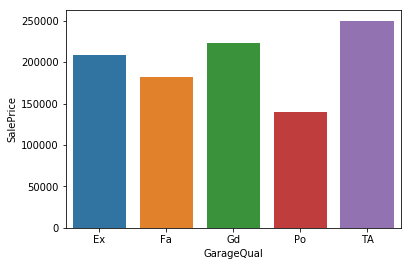

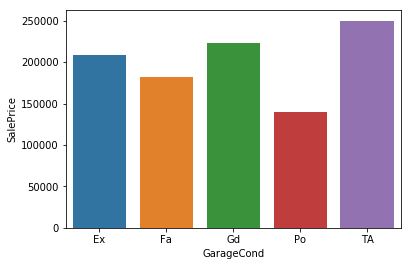

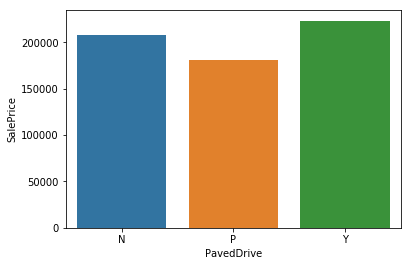

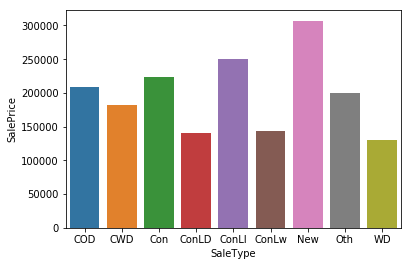

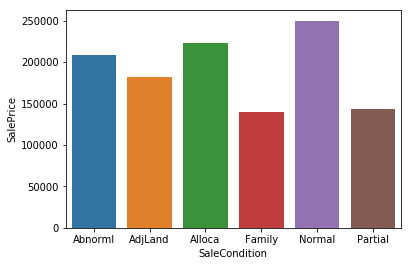

In [24]:
for i in cat_col:
    groups=train.groupby(i)['SalePrice'].median().reset_index()
    sns.barplot(data=groups,x=i,y=data['SalePrice'])
    plt.show()

In [25]:
#Getting the no. of unique values in each categorical columns
for i in cat_col:
    print('No. of unique values in {} is :'.format(i),train[i].nunique())

No. of unique values in MSZoning is : 5
No. of unique values in Street is : 2
No. of unique values in LotShape is : 4
No. of unique values in LandContour is : 4
No. of unique values in Utilities is : 2
No. of unique values in LotConfig is : 5
No. of unique values in LandSlope is : 3
No. of unique values in Neighborhood is : 25
No. of unique values in Condition1 is : 9
No. of unique values in Condition2 is : 8
No. of unique values in BldgType is : 5
No. of unique values in HouseStyle is : 8
No. of unique values in RoofStyle is : 6
No. of unique values in RoofMatl is : 8
No. of unique values in Exterior1st is : 15
No. of unique values in Exterior2nd is : 16
No. of unique values in MasVnrType is : 4
No. of unique values in ExterQual is : 4
No. of unique values in ExterCond is : 5
No. of unique values in Foundation is : 6
No. of unique values in BsmtQual is : 4
No. of unique values in BsmtCond is : 4
No. of unique values in BsmtExposure is : 4
No. of unique values in BsmtFinType1 is : 6
No

## Scaling

In [26]:
scale=[i for i in train.columns if i in num_col and i not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit_transform(train[scale])
newdata = pd.concat([train[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(train[scale]), columns=scale)],
                    axis=1)
newdata.head()

,Id,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,12.247694,0.32,0.447739,0.440340,0.625,0.375,0.944764,0.884883,0.477321,0.396490,0.0,0.088994,0.404975,0.358587,0.469231,0.0,0.603868,0.4,0.0,0.666667,0.5,0.625,0.0,0.750,0.0,0.935027,0.571429,0.584066,0.000000,0.358824,0.0,0.0,0.0,0.0,0.0,0.090909,0.50
1,2,12.109011,0.00,0.636431,0.514676,0.500,1.000,0.729887,0.437059,0.000000,0.549245,0.0,0.168496,0.606965,0.571516,0.000000,0.0,0.436214,0.0,0.0,0.666667,0.0,0.625,0.0,0.500,0.4,0.682274,0.571429,0.490274,0.709524,0.000000,0.0,0.0,0.0,0.0,0.0,0.363636,0.25
2,3,12.317167,0.32,0.488742,0.607076,0.625,0.375,0.928947,0.868405,0.394521,0.272938,0.0,0.257490,0.436816,0.398138,0.475824,0.0,0.627866,0.4,0.0,0.666667,0.5,0.625,0.0,0.500,0.4,0.916422,0.571429,0.648015,0.000000,0.247059,0.0,0.0,0.0,0.0,0.0,0.727273,0.50
3,4,11.849398,0.40,0.375000,0.511633,0.625,0.375,0.233411,0.336712,0.000000,0.121306,0.0,0.320380,0.355224,0.422054,0.415385,0.0,0.606122,0.4,0.0,0.333333,0.0,0.625,0.0,0.625,0.4,0.888479,0.857143,0.684253,0.000000,0.205882,0.0,0.0,0.0,0.0,0.0,0.090909,0.00
4,5,12.429216,0.32,0.680769,0.745201,0.750,0.375,0.921032,0.835424,0.852359,0.367848,0.0,0.290715,0.548756,0.518148,0.578571,0.0,0.742416,0.4,0.0,0.666667,0.5,0.875,0.0,0.875,0.4,0.907112,0.857143,0.891021,0.457143,0.494118,0.0,0.0,0.0,0.0,0.0,1.000000,0.50


## Applying same on test data

In [27]:
num_col1 = [i for i in test.columns if train[i].dtype!="O"]
cat_col1 = [i for i in test.columns if train[i].dtype=="O"]
des_col1 = [i for i in num_col1 if (train[i].nunique()<25)]
cont_col1 = [i for i in num_col1 if (train[i].nunique()>25) and i not in ['Id']]
#Applying log transformation
for feature in cont_col1:
    if 0 in test[feature].unique():
        pass
    else:
        test[feature]=np.log(test[feature])

In [28]:
#Ouliers handling
test[num_col1]=test[num_col1].apply(lambda x: cap_out(x))

C:\Users\Kishlaya\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  after removing the cwd from sys.path.
C:\Users\Kishlaya\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  """


In [29]:
#Scaling
scale=[i for i in test.columns if i in num_col1 and i not in ['Id']]
scaler=MinMaxScaler()
scaler.fit_transform(test[scale])
newdata1 = pd.concat([test[['Id']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(test[scale]), columns=scale)],
                    axis=1)
newdata1.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,0.00,0.649125,0.630090,0.375,0.625,0.621404,0.185617,0.000000,0.248441,0.0,0.162113,0.422025,0.388848,0.000000,0.0,0.247103,0.0,0.0,0.285714,0.0,0.375,0.0,0.285714,0.0,0.378118,0.285714,0.758048,0.333333,0.000000,0.0,0.0,0.0,0.0,0.0,0.454545,1.0
1,1462,0.00,0.660962,0.745649,0.500,0.625,0.597918,0.135097,0.266667,0.489980,0.0,0.243771,0.636516,0.603511,0.000000,0.0,0.475352,0.0,0.0,0.285714,0.5,0.625,0.0,0.428571,0.0,0.359400,0.285714,0.323988,0.935714,0.200000,0.0,0.0,0.0,0.0,0.0,0.454545,1.0
2,1463,0.32,0.574837,0.728117,0.375,0.375,0.900463,0.802410,0.000000,0.419907,0.0,0.082258,0.444098,0.407955,0.414793,0.0,0.593193,0.0,0.0,0.571429,0.5,0.625,0.0,0.428571,0.4,0.600535,0.571429,0.500519,0.504762,0.188889,0.0,0.0,0.0,0.0,0.0,0.181818,1.0
3,1464,0.32,0.625000,0.544137,0.500,0.625,0.908143,0.802410,0.049383,0.319575,0.0,0.194536,0.443138,0.406780,0.401183,0.0,0.584239,0.0,0.0,0.571429,0.5,0.625,0.0,0.571429,0.4,0.606656,0.571429,0.488058,0.857143,0.200000,0.0,0.0,0.0,0.0,0.0,0.454545,1.0
4,1465,0.80,0.057555,0.155308,0.750,0.375,0.862007,0.703169,0.000000,0.139615,0.0,0.610627,0.613004,0.583056,0.000000,0.0,0.453603,0.0,0.0,0.571429,0.0,0.375,0.0,0.285714,0.0,0.569885,0.571429,0.525441,0.000000,0.455556,0.0,0.0,0.0,0.0,0.0,0.000000,1.0


In [30]:
newtest=pd.concat([newdata1,test[cat_col1]],axis=1)
newtrain=pd.concat([newdata,train[cat_col]],axis=1)

In [31]:
newtrain.shape

(1460, 76)

In [32]:
newtest.shape

(1459, 75)

In [105]:
final_df=pd.concat([newtrain,newtest],axis=0)

C:\Users\Kishlaya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [106]:
final_df.shape

(2919, 76)

## Encoding 

In [107]:
finalcat=[i for i in final_df.columns if final_df[i].dtype=='O']

In [108]:
print(finalcat)

['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities']


In [109]:
def onehot(cols):
    df_final=final_df
    i=0
    for fields in cols:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
        
    df_final=pd.concat([final_df,df_final],axis=1)
    return df_final

In [110]:
final_df=onehot(finalcat)

BldgType
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
BsmtQual
CentralAir
Condition1
Condition2
Electrical
ExterCond
ExterQual
Exterior1st
Exterior2nd
Foundation
Functional
GarageCond
GarageFinish
GarageQual
GarageType
Heating
HeatingQC
HouseStyle
KitchenQual
LandContour
LandSlope
LotConfig
LotShape
MSZoning
MasVnrType
Neighborhood
PavedDrive
RoofMatl
RoofStyle
SaleCondition
SaleType
Street
Utilities


In [111]:
final_df.fillna(0,inplace=True)

In [112]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [113]:
final_df.drop(['Id'],axis=1,inplace=True)

In [114]:
final_df.shape

(2919, 177)

In [147]:
df_train=final_df.iloc[:1460,:]
df_test=final_df.iloc[1460:,:]

In [148]:
df_test.shape

(1459, 177)

In [149]:
df_train.shape

(1460, 177)

## Feature Selection

In [150]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [151]:
Y_train=df_train['SalePrice']
X_train=df_train.drop(columns=['SalePrice'])

In [152]:
feat_mod_train = SelectFromModel(Lasso(alpha=0.01,random_state=0))
feat_mod_train.fit(X_train,Y_train)

SelectFromModel(estimator=Lasso(alpha=0.01, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [153]:
sel_feat=X_train.columns[(feat_mod_train.get_support())]
print('total features in train: {}'.format((X_train.shape[1])))
print('selected features in train: {}'.format(len(sel_feat)))

total features in train: 176
selected features in train: 18


In [154]:
sel_feat

Index(['BsmtFinSF1', 'Fireplaces', 'GarageArea', 'GarageCars', 'GrLivArea',
       'LotArea', 'OverallQual', 'TotalBsmtSF', 'YearRemodAdd', 'No', 'GLQ',
       'Unf', 'PConc', 'Detchd', 'Reg', 'RL', 'RM', 'None'],
      dtype='object')

In [155]:
X_train=X_train[sel_feat]
df_test=df_test[sel_feat]

In [156]:
X_train.shape

(1460, 18)

In [157]:
df_test.shape

(1459, 18)

In [159]:
Y_train.shape

(1460,)

## Building Model

In [160]:
import xgboost
regressor=xgboost.XGBRegressor()
classifier=xgboost.XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

#Creating hyperparameter grid for Tuning.
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [161]:
#Setting up random cv for best parameters for our model.
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

random_cv.fit(X_train,Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   14.5s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   51.2s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  1.9min finished
C:\Users\Kishlaya\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Kishlaya\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[13:54:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                   iid='warn', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree',

In [162]:
random_cv.best_estimator_

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=5, min_child_weight=2, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [163]:
#Fitting the model with the best hyperparameters searched from randomizedCV
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

regressor.fit(X_train,Y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1, verbosity=1)

In [164]:
#Saving the file
import pickle
filename = 'finalized_model3.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [165]:
y_pred=regressor.predict(df_test)

In [166]:
y_pred

array([11.670528, 11.979448, 12.148219, ..., 12.092535, 11.644783,
       12.368541], dtype=float32)

In [167]:
y_pred=np.exp(y_pred)

In [168]:
pred=pd.Series(y_pred)

In [169]:
final = pd.concat([test['Id'],pred],axis=1,keys=['Id','SalePrice'])

In [170]:
final.head()

,Id,SalePrice
0,1461,117070.125000
1,1462,159444.046875
2,1463,188757.640625
3,1464,190224.109375
4,1465,183285.640625


In [171]:
final.to_csv('sub.csv',index=False)

In [ ]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(ann_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

### By these steps I got RMSE of 0.13 after uploading my file to kaggle.
### Work in progress in to get better accuracy.
### Thank You for going through this.